In [153]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-resource/HR_comma_sep.csv


**INTRODUCTION**
We're trying to predict whether an employee will leave based on various features such as number of projects they worked on, time spent at the company, last performance review, salary etc. The dataset has around 15,000 rows and 9 columns. The column we're trying to predict is called "left". It's a binary column with 0/1 values. The label 1 means that the employee has left.

**Dataset Details**: 
* satisfacion_level: Showing satisfaction of a particular employee
* last_evaluation: Showing last evaluation of a particular employee
* number_project: Showing number of projects handled a particular employee
* average_montly_hours: Showing the monthly hours that were spent the particular emloyee
* time_spend_company: Shows the number of years spent by the particular employee in the company.
* Work_accident: Showing an employee has whether been part of the company or not.
* left: Tells either and employee has left the company or not. Shows two values 0= not left, 1= left
* promotion_last_5years: Shows that the whether the employee has got any promotion in the last 5 years or not.
* dept: Shows the departments
* salary: Shows the salary type of the employee

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/human-resource/HR_comma_sep.csv


**PRE-PROCESSING**

In [155]:
hr_data = pd.read_csv('/kaggle/input/human-resource/HR_comma_sep.csv')
df = hr_data.copy()
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [156]:
df.shape

(14999, 10)

In [157]:
#Change column name from sales to dept
df.rename(columns = {'sales':'dept'}, inplace = True)
df.rename(columns = {'time_spend_company':'years_spend_comp'}, inplace = True)

df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'years_spend_comp', 'Work_accident', 'left',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

In [158]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
years_spend_comp           int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object

In [159]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,years_spend_comp,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [160]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
years_spend_comp         0
Work_accident            0
left                     0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

In [161]:
#count the frequency of each value in left column
(df['left'].value_counts())/df['left'].count()


0    0.761917
1    0.238083
Name: left, dtype: float64

**EXPLORATION**

/tmp/ipykernel_32/3923811045.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()[['left']], annot = True, vmin =-1, vmax = 1)


<Axes: >

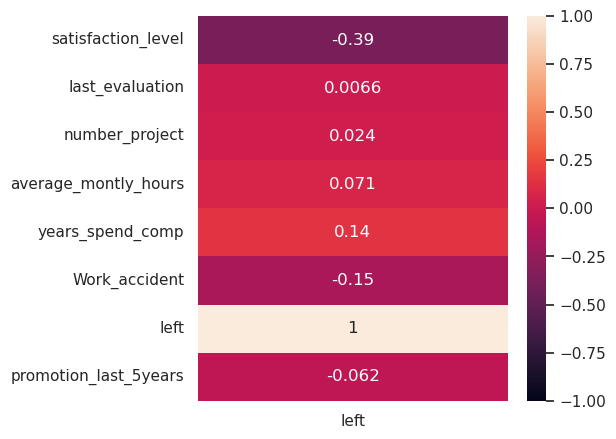

In [162]:
#Correlation with left columns
plt.figure(figsize = (5,5))
sns.heatmap(df.corr()[['left']], annot = True, vmin =-1, vmax = 1)


In this plot, we can see that positive values represent correlation, negative values represent inverse correlation with the "left" column. "left" itself, of course, has perfect correlation (=1).
The "satisfaction_level" inversely correlated with "left, which makes sense as employee who have high level of satisfaction will have low chance of leaving


/tmp/ipykernel_32/1439035700.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, square=True, vmin=-1, vmax=1)


Text(0.5, 1.0, 'Correlation')

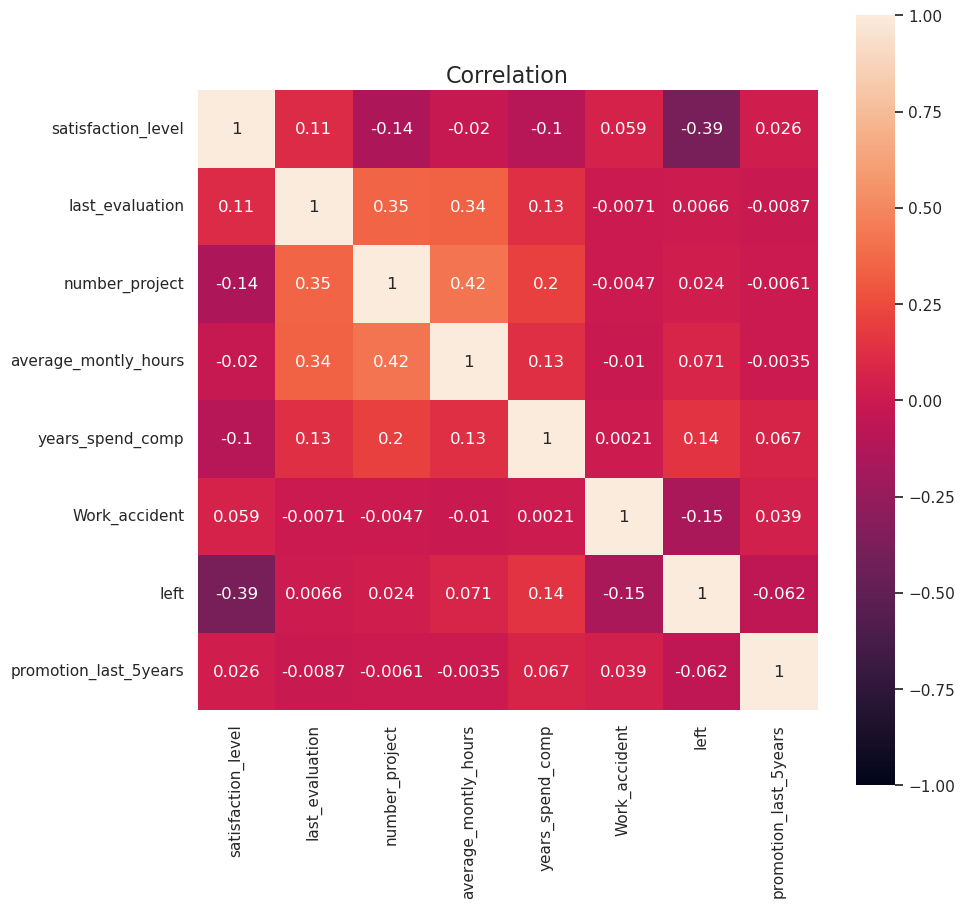

In [163]:
#Correlation shown in pairwise plot
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot=True, square=True, vmin=-1, vmax=1)
plt.title("Correlation",fontsize=16)

We see that "average_monthly_hours" has strong positive correlation with "number_project" which can easily understand that the they have to spend more  hours on working because they have more projects.

Text(0.5, 1.0, 'Number of employees for number project')

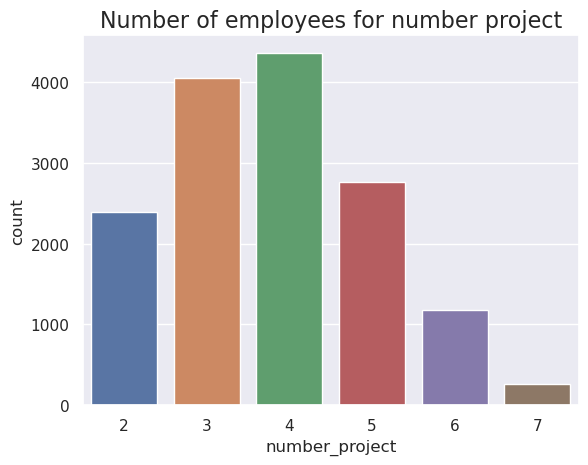

In [164]:
sns.countplot(x='number_project', data = df)
plt.title("Number of employees for number project",fontsize=16)

In [165]:
df_group = df.groupby('number_project')['left'].count()
print(df_group)

number_project
2    2388
3    4055
4    4365
5    2761
6    1174
7     256
Name: left, dtype: int64


Through this plot, more than 4300 employees have assigned with 4 projects, followed by 4000 people with 3 projects.

Text(0.5, 1.0, 'Number of employees in each department')

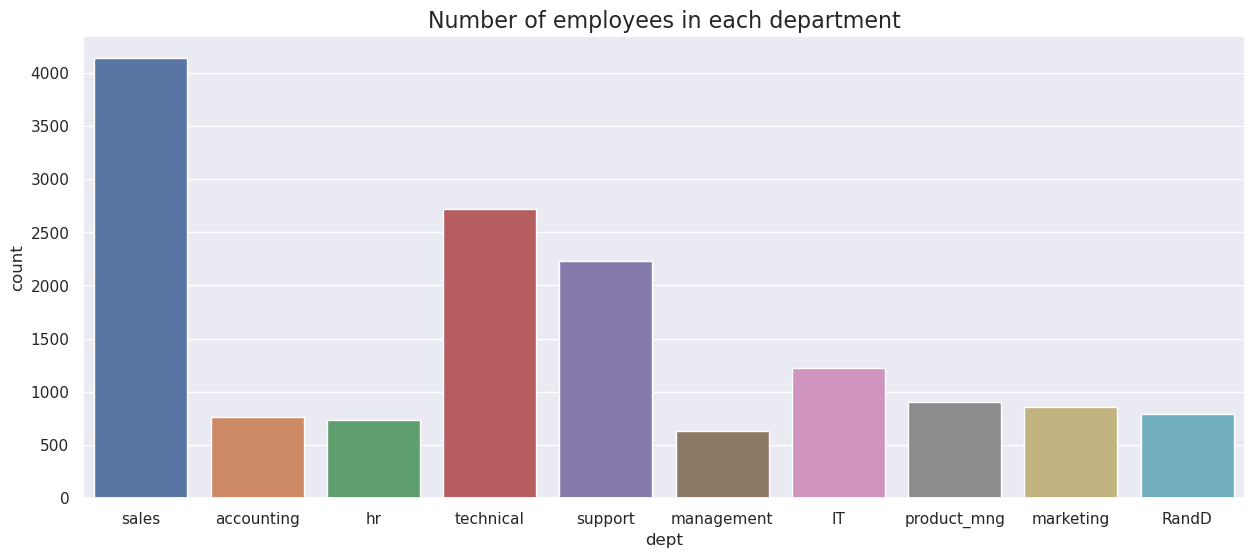

In [166]:
#Employee by Department
plt.figure(figsize=(15,6));
sns.countplot(x='dept', data=df);
plt.title("Number of employees in each department",fontsize=16)

In [167]:
#Count the Frequency of left in each department (with normalized data)
temp1 = df.groupby('dept')['left'].value_counts(normalize=True).reset_index(name='Percentage')
print(temp1)

           dept  left  Percentage
0            IT     0    0.777506
1            IT     1    0.222494
2         RandD     0    0.846252
3         RandD     1    0.153748
4    accounting     0    0.734029
5    accounting     1    0.265971
6            hr     0    0.709066
7            hr     1    0.290934
8    management     0    0.855556
9    management     1    0.144444
10    marketing     0    0.763403
11    marketing     1    0.236597
12  product_mng     0    0.780488
13  product_mng     1    0.219512
14        sales     0    0.755072
15        sales     1    0.244928
16      support     0    0.751009
17      support     1    0.248991
18    technical     0    0.743750
19    technical     1    0.256250


Text(0.5, 1.0, 'Percentage of left/stay in each department')

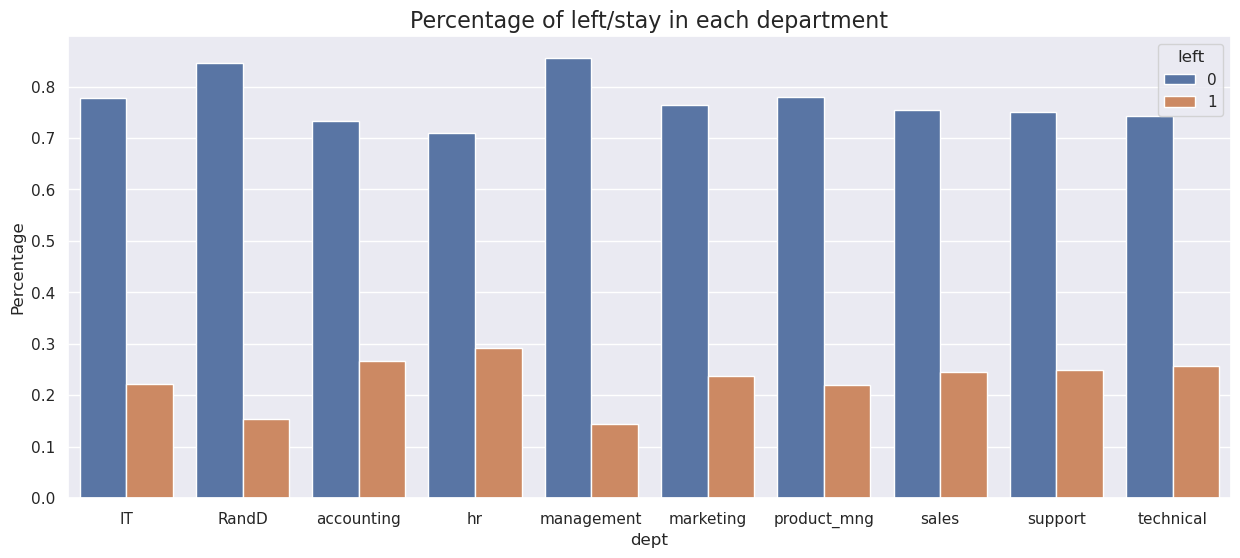

In [168]:
plt.figure(figsize=(15,6));
sns.barplot(x='dept', y='Percentage', hue='left', data=temp1)
plt.title("Percentage of left/stay in each department",fontsize=16)

We can see that RandD and Management department are the team having biggest percentage of staying(0 value) and lowest porpotion of leaving(1 value). While, HR is the department has the largest percentage of leaving.

/tmp/ipykernel_32/654936789.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df.left==0),'satisfaction_level'],color="b",shade=True,label="Stays in company")
/tmp/ipykernel_32/654936789.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df.left==1),'satisfaction_level'],color="r",shade=True,label="Left the company")


Text(0.5, 1.0, 'Employee Turnover with Satisfaction Level')

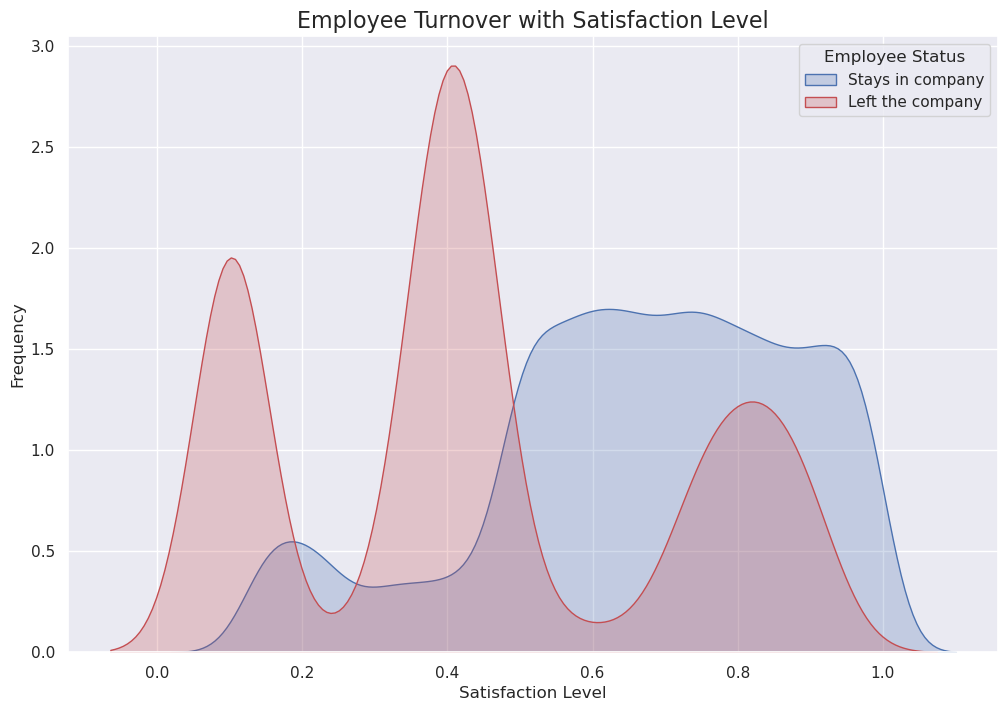

In [169]:
plt.figure(figsize=(12,8))
ax=sns.kdeplot(df.loc[(df.left==0),'satisfaction_level'],color="b",shade=True,label="Stays in company")
ax=sns.kdeplot(df.loc[(df.left==1),'satisfaction_level'],color="r",shade=True,label="Left the company")
ax.set(xlabel='Satisfaction Level',ylabel="Frequency")
# Add labels to the legend
ax.legend(title='Employee Status', labels=['Stays in company', 'Left the company'])
plt.title("Employee Turnover with Satisfaction Level",fontsize=16)

It can be seen that,that people who are leaving have a low satisfaction level (it peaks at 0.4 satisfaction level) meaning that most likely below 0.5 are leaving and people having a high satisfaction_level, most likely above 0.5 are likely to stay. 
I will create a plot to split the satisfaction level as High/Low at 0.5 point below:

Text(0.5, 1.0, 'Count the number of employees in satisfaction level')

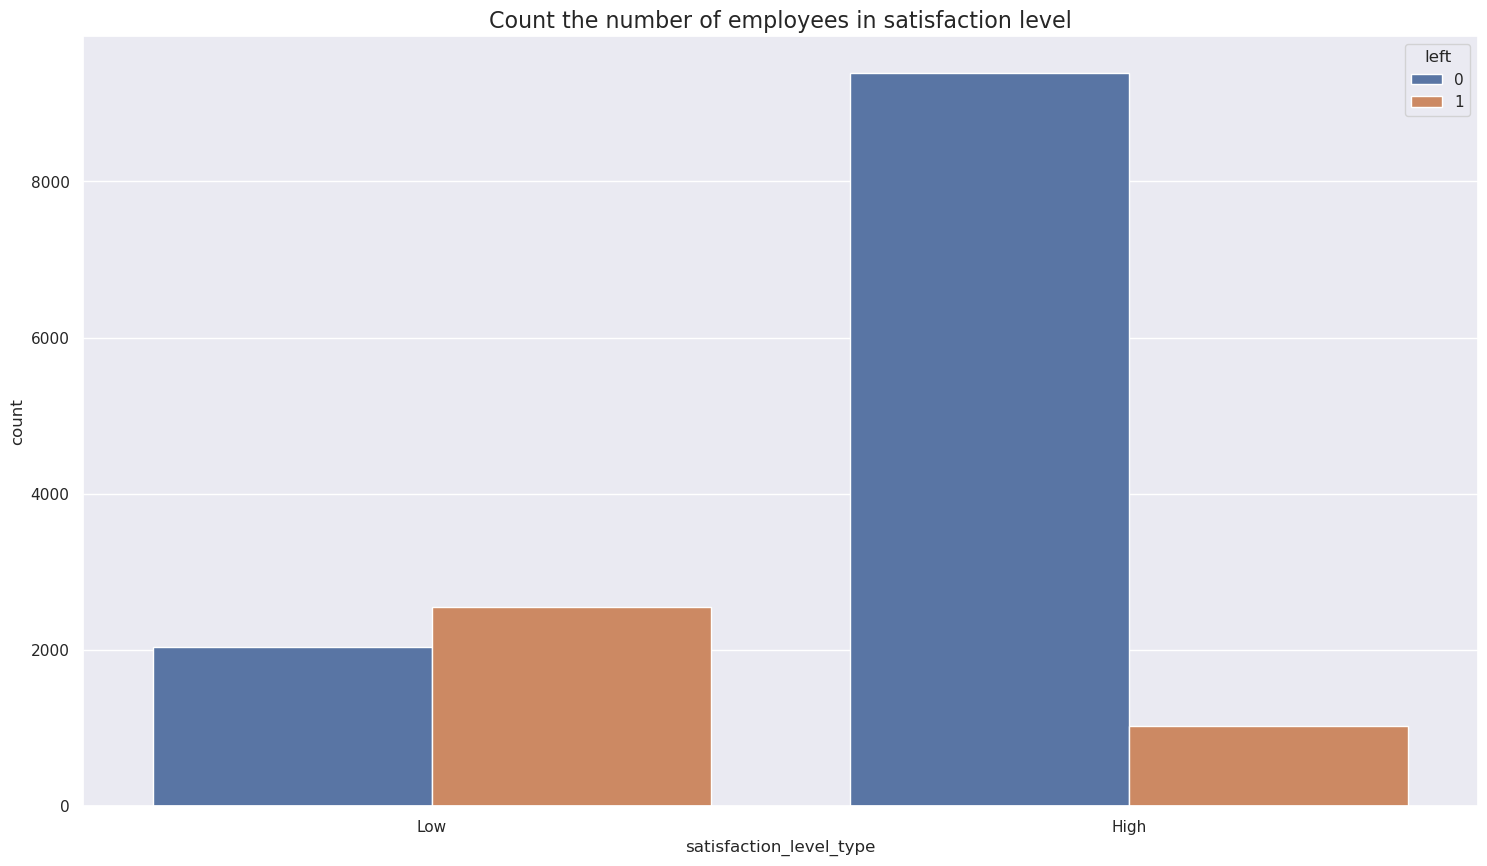

In [170]:
#Creating new column to categorize the satisfaction level
df['satisfaction_level_type']=''
df.loc[ df['satisfaction_level'] >= 0.5, 'satisfaction_level_type'] = 'High'
df.loc[ df['satisfaction_level'] < 0.5, 'satisfaction_level_type'] = 'Low'

#Plot new categorizes satisfaction level
plt.figure(figsize=(18,10));
sns.countplot(x='satisfaction_level_type', hue='left' , data=df)
plt.title("Count the number of employees in satisfaction level",fontsize=16)



Let explore how number of projects impact satisfaction level

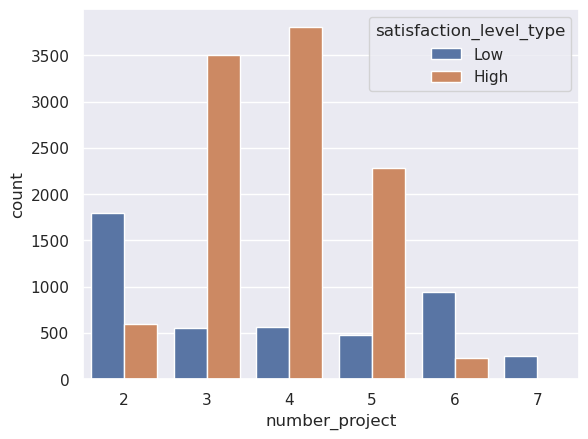

In [171]:
sns.countplot(x='number_project', hue='satisfaction_level_type', data=df);

Employees having high number of projects such as 6 and 7, and employees having extremely less number of projects are leaving the company because of low satisfaction level.
It can partly conclude that employees are satisfied with 3-4 projects per person

**Normalization Scaling**

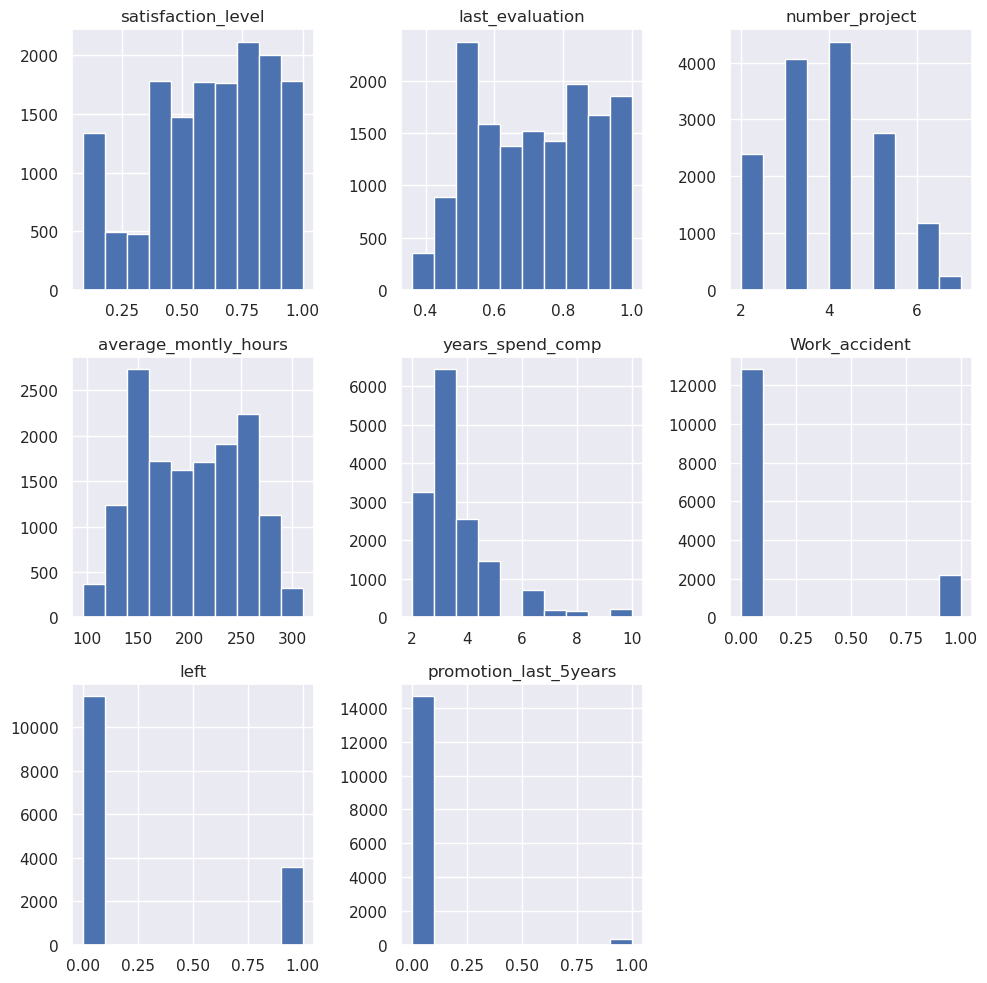

In [172]:
#Distribution of values for normailization scaling
df.hist(figsize = (10,10))
plt.tight_layout()

From above histograms, we can see that 'average_monthly_hours', 'years_spend_comp' and 'number_project' need tobe normalized to scale[0,1]. Others attributes are already in range [0,1] so we do not need to normalize them.

**ANN Algorithm**

In [173]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Define the features to be scaled
scale_features = ['average_montly_hours', 'number_project', 'years_spend_comp']

# Standardize the selected features
df[scale_features] = scaler.fit_transform(df[scale_features])
print(df[scale_features])

       average_montly_hours  number_project  years_spend_comp
0                 -0.882040       -1.462863         -0.341235
1                  1.220423        0.971113          1.713436
2                  1.420657        2.593763          0.343655
3                  0.439508        0.971113          1.028546
4                 -0.841993       -1.462863         -0.341235
...                     ...             ...               ...
14994             -1.002181       -1.462863         -0.341235
14995             -0.821970       -1.462863         -0.341235
14996             -1.162368       -1.462863         -0.341235
14997              1.580845        1.782438          0.343655
14998             -0.862016       -1.462863         -0.341235

[14999 rows x 3 columns]


Real-valued features have been scaled to be in [0,1] range. Now the categorical features need to be converted into one-hot representation.

In [174]:
df.dtypes

satisfaction_level         float64
last_evaluation            float64
number_project             float64
average_montly_hours       float64
years_spend_comp           float64
Work_accident                int64
left                         int64
promotion_last_5years        int64
dept                        object
salary                      object
satisfaction_level_type     object
dtype: object

In [175]:
categorical_features = ['dept', 'salary', 'satisfaction_level_type']
df_cat = pd.get_dummies(df[categorical_features])
df_drop = df.drop(df[categorical_features], axis=1)
df = pd.concat([df_drop, df_cat], axis=1)
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,years_spend_comp,Work_accident,left,promotion_last_5years,dept_IT,dept_RandD,...,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium,satisfaction_level_type_High,satisfaction_level_type_Low
0,0.38,0.53,-1.462863,-0.882040,-0.341235,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,0.80,0.86,0.971113,1.220423,1.713436,0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,0.11,0.88,2.593763,1.420657,0.343655,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
3,0.72,0.87,0.971113,0.439508,1.028546,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4,0.37,0.52,-1.462863,-0.841993,-0.341235,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1


In [176]:
#Train and test split
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['left']).copy()
y = df['left'].values
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=0)


In [177]:
# train neural network with 2 hidden nodes
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(3), activation='logistic', solver='lbfgs',random_state=1)
clf.fit(X_train, y_train)


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', hidden_layer_sizes=3, random_state=1,
              solver='lbfgs')

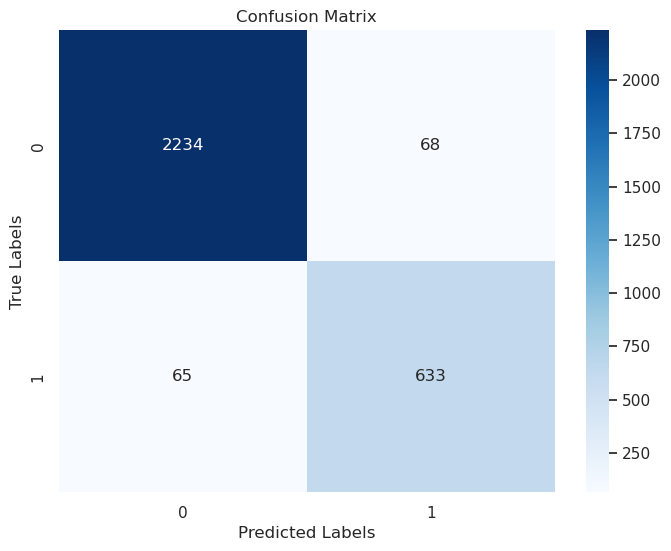

Accuracy: 0.9556666666666667


In [178]:
#Predicting y for X_test
y_pred = clf.predict(X_test)

# validation performance
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

from sklearn.metrics import accuracy_score
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)